# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [98]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [99]:
# your answer here
employee = pd.read_csv('./data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [100]:
# Method 1
# your answer here
employee.groupby(by= 'Department')[['Salary']].agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [101]:
# Method 2
# your answer here
employee.pivot_table(values= 'Salary', index= 'Department', aggfunc= 'mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [102]:
# your answer here
employee.pivot_table(values= 'Salary', index= ['Department', 'Title'], aggfunc= 'mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [103]:
# your answer here
employee.pivot_table(values= ['Years','Salary'], index= 'Title', aggfunc= 'mean')

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [104]:
# your answer here
employee.pivot_table(values= ['Salary', 'Name'], index= ['Department', 'Title'], aggfunc= {'Salary': 'mean', 'Name': 'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [105]:
# your answer here
pt= employee.pivot_table(values= ['Salary'], index= ['Department', 'Title'], aggfunc= [np.median, 'min', 'max', 'std'])
pt

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [106]:
print("""There are 3 results which are NaN. The reason for that is that there is just one instance in those groups (HR, VP), \
(IT, VP) and (IT, associate). The computation cannot be performed, so the standard deviation will be filled with the value \
of salary of that row in order to distinguish from situations where more than one value exists, but the standard deviation is 0.""")

There are 3 results which are NaN. The reason for that is that there is just one instance in those groups (HR, VP), (IT, VP) and (IT, associate). The computation cannot be performed, so the standard deviation will be filled with the value of salary of that row in order to distinguish from situations where more than one value exists, but the standard deviation is 0.


#### Based on your comments, fill the missing values with an appropriate value.

In [107]:
# your answer here
pt= pt.fillna(method= 'ffill', axis= 1)
pt

median    min    max        std
                     Salary Salary Salary     Salary
Department Title                                    
HR         VP          70.0   70.0   70.0  70.000000
           analyst     32.5   30.0   35.0   3.535534
IT         VP          70.0   70.0   70.0  70.000000
           analyst     32.5   30.0   35.0   3.535534
           associate   60.0   60.0   60.0  60.000000
Sales      associate   55.0   55.0   55.0   0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [108]:
# your answer here
employee.pivot_table(values= 'Salary', index= 'Department', aggfunc= ['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [109]:
# your answer here
employee.pivot_table(values= ['Years', 'Salary'], index= ['Department', 'Title'], aggfunc= \
                     {'Years': 'sum', 'Salary': 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [110]:
# let's define a function where every maxima for each department is removed, unless just one value exists there
def remove_max(dataframe):
    aggregated_data = dataframe.groupby(by= 'Department')[['Salary']].agg('max')
    for count, value in enumerate(list(aggregated_data.index)):
        if len(dataframe[(dataframe['Department'] == value) & (dataframe['Salary'] == aggregated_data.iloc[count,].values[0])]) != len(dataframe[(dataframe['Department'] == value)]):
            dataframe.drop(dataframe[(dataframe['Department'] == value) & (dataframe['Salary'] == aggregated_data.iloc[count,].values[0])].index[0], inplace= True)
            
    return dataframe

remove_max(employee)
employee.pivot_table(values= 'Salary', index= 'Department', aggfunc= 'mean')

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [111]:
# your answer here
fitbit = pd.read_csv('./data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [112]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [113]:
# your answer here
fitbit.describe(include= 'all')

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
unique,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,05-02-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,NaN,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,NaN,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,NaN,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,NaN,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [114]:
# your answer here
fitbit[['Minutes Very Active', 'Steps']].corr(method= 'pearson').iloc[0,1]

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

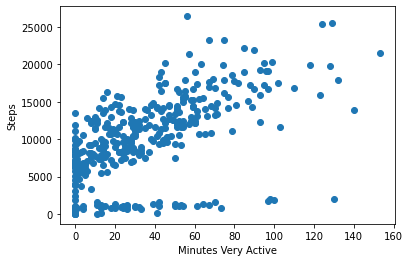

In [115]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel(xlabel='Minutes Very Active')
plt.ylabel(ylabel='Steps');

#### What can you say about Minute Very Active and Steps? Write a comment below

In [116]:
# your answer here
# It seems that there is a certain degree of linear relationship between 'Minutes Very Active' and 'Steps'. The Pearson 
# correlation obtained above (0.57) already suggested this fact.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [117]:
# your answer here
fitbit[['Minutes Sedentary', 'Steps']].corr(method= 'pearson').iloc[0,1]

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

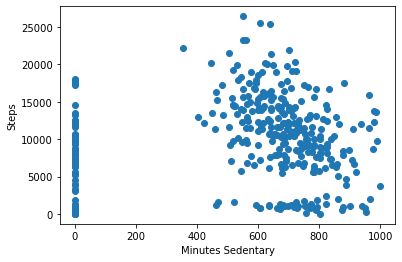

In [118]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel(xlabel='Minutes Sedentary')
plt.ylabel(ylabel='Steps');
# As it was already suggested by the correlation obtained above (0.077), there is not a linear relationship between 
# 'Minutes Sedentary' and 'Steps'

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [119]:
# your answer here
fitbit[['MinutesOfSleep', 'Steps']].corr(method= 'pearson').iloc[0,1]

0.1309856595083636

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

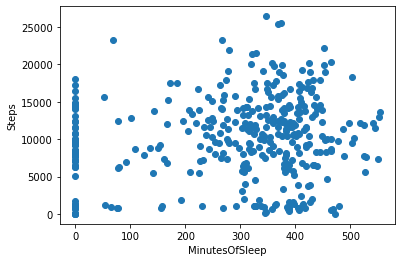

In [120]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel(xlabel='MinutesOfSleep')
plt.ylabel(ylabel='Steps');
# As it was already suggested by the correlation obtained above (0.13), there is not a linear relationship between 
# 'MinutesOfSleep' and 'Steps'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [121]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr(method= 'pearson')
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [122]:
# your answer here
print('The features which are highly correlated with the variable Steps are:')
for i in range(len(cor_fit['Steps'].sort_values(ascending= False)[1:].head(3))):
    print('* '+cor_fit['Steps'].sort_values(ascending= False)[1:].index[i]+' ('+str(cor_fit['Steps'].sort_values(ascending= False)[1:][i])+')')

The features which are highly correlated with the variable Steps are:
* Minutes Very Active (0.5714518481062607)
* Floors (0.30651077257055176)
* Calorie burned (0.2553050408017204)


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [123]:
# your answer here
time_grades = pd.read_csv('./data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

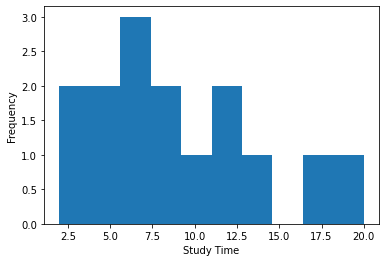

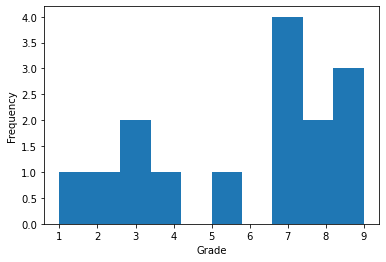

In [124]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(time_grades[['Study time']]);
ax1.set_xlabel('Study Time')
ax1.set_ylabel('Frequency')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(time_grades[['Grade']]);
ax2.set_xlabel('Grade')
ax2.set_ylabel('Frequency');

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [125]:
# your answer here
print('Pearson: '+str(time_grades[['Study time', 'Grade']].corr(method= 'pearson').iloc[0,1]))
print('Spearman: '+str(time_grades[['Study time', 'Grade']].corr(method= 'spearman').iloc[0,1]))
# Both correlation values are around 0.8 which suggests there is a strong linear relationship between 'Study Time' and 
# 'Grade'

Pearson: 0.7980456073578857
Spearman: 0.8196587530369419


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

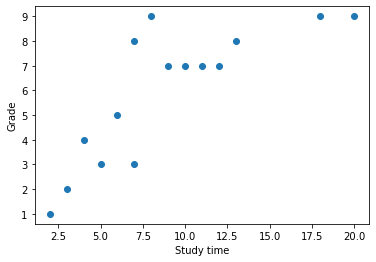

In [126]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade']);
plt.xlabel(xlabel='Study time')
plt.ylabel(ylabel='Grade');
# As it was already suggested by the correlation values obtained above (~ 0.8), there is a linear relationship between 
# 'Study Time' and 'Grade'

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [127]:
# your answer here
# The Pearson correlation is only sensitive to linear relationships. On the other hand, the Spearman correlation is more 
# sensitive to non-linear relationships. In this data set, the Spearman correlation is slightly higher than Pearson 
# correlation, because the data is best fit with a line slightly non-linear.